# Projeto 2- Classificação Binária Breast Cancer com validação cruzada e dropout

## Importação das bibliotecas

In [ ]:
!pip install skorch #validação cruzada

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 221.3/221.3 kB 2.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import torch.nn as nn
from skorch import NeuralNetBinaryClassifier
import torch
import seaborn as sns
from sklearn.model_selection import cross_val_score
from google import colab as cl
torch.__version__

'2.0.1+cu118'

## Base de dados

In [ ]:
np.random.seed(123)
torch.manual_seed(123)

In [ ]:
file_upload = cl.files.upload() #importando arquivo para computador
previsores = pd.read_csv('/content/entradas_breast.csv')
classe = pd.read_csv('/content/saidas_breast.csv')

Saving saidas_breast.csv to saidas_breast.csv
Saving entradas_breast.csv to entradas_breast.csv


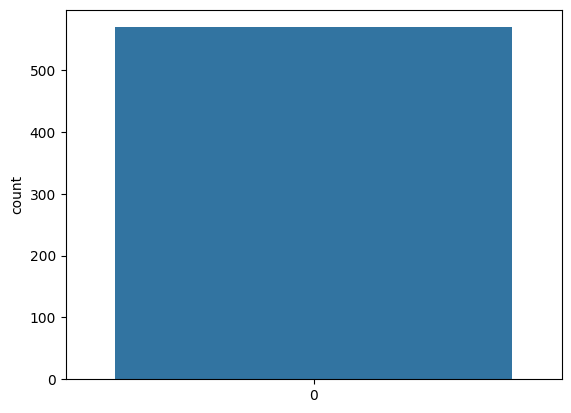

In [ ]:
sns.countplot(classe['0']);

In [ ]:
previsores = np.array(previsores, dtype='float32')
classe = np.array(classe, dtype='float32').squeeze(1)

## Classe para estrutura da rede neural

In [ ]:
class classificador_torch(nn.Module):

  def __init__(self):
    super().__init__()

    #30 -> 16 -> 16 -> 1
    self.dense0 = nn.Linear(in_features=30, out_features=16)
    torch.nn.init.uniform_(self.dense0.weight)
    self.activation0 = nn.ReLU()

    self.dense1 = nn.Linear(in_features=16, out_features=16)
    torch.nn.init.uniform_(self.dense1.weight)
    self.activation1 = nn.ReLU()

    self.dense2 = nn.Linear(in_features=16, out_features=1)
    torch.nn.init.uniform_(self.dense2.weight)
    self.output = nn.Sigmoid()


  def forward(self, X):
    X = self.dense0(X)
    X = self.activation0(X)

    X = self.dense1(X)
    X = self.activation1(X)

    X = self.dense2(X)
    X = self.output(X)

    return X

## Skorch

In [ ]:
classificador_sklearn = NeuralNetBinaryClassifier(module = classificador_torch,
                                                  criterion = torch.nn.BCELoss,
                                                  optimizer = torch.optim.Adam,
                                                  lr = 0.001,
                                                  optimizer__weight_decay = 0.0001,
                                                  max_epochs = 100,
                                                  batch_size = 10,
                                                  train_split = False)

## Validação Cruzada

In [ ]:
resultados = cross_val_score(classificador_sklearn, previsores, classe, cv = 10, scoring = 'accuracy')

  epoch    train_loss     dur
-------  ------------  ------
      1       37.1094  1.4057
      2       37.1094  1.0600
      3       37.1094  1.3739
      4       37.1094  1.0682
      5       37.1094  1.7057
      6       37.1094  2.0189
      7       37.1094  1.9137
      8       37.1094  1.1913
      9       37.1094  1.1595
     10       37.1094  1.2237
     11       37.1094  0.9947
     12       37.1094  1.0099
     13       37.1094  0.6905
     14       37.1094  0.6170
     15       37.1094  0.9265
     16       37.1094  0.7161
     17       37.1094  0.6134
     18       37.1094  1.2972
     19       37.1094  1.0547
     20       37.1094  1.2557
     21       37.1094  0.8921
     22       37.1094  0.5019
     23       37.1094  0.4821
     24       37.1094  0.9751
     25       13.5893  0.7035
     26        0.5466  0.4878
     27        0.5314  0.4869
     28        0.4981  0.4488
     29        0.4820  0.3164
     30        0.4769  0.2644
     31        0.4528  0.1843
     32   

In [ ]:
resultados.shape

(10,)

In [ ]:
resultados

array([0.84210526, 0.61403509, 0.89473684, 0.63157895, 0.85964912,
       0.89473684, 0.87719298, 0.92982456, 0.63157895, 0.625     ])

In [ ]:
media = resultados.mean()
media

0.7800438596491228

In [ ]:
desvio_padrao = resultados.std()
desvio_padrao

0.12808237895474653

## Dropout

In [ ]:
class classificador_torch(nn.Module):

  def __init__(self):
    super().__init__()

    #30 -> 16 -> 16 -> 1
    self.dense0 = nn.Linear(in_features=30, out_features=16)
    torch.nn.init.uniform_(self.dense0.weight)
    self.activation0 = nn.ReLU()
    self.dropout0 = nn.Dropout(0.2)

    self.dense1 = nn.Linear(in_features=16, out_features=16)
    torch.nn.init.uniform_(self.dense1.weight)
    self.activation1 = nn.ReLU()
    self.dropout1 = nn.Dropout(0.2)

    self.dense2 = nn.Linear(in_features=16, out_features=1)
    torch.nn.init.uniform_(self.dense2.weight)
    self.output = nn.Sigmoid()


  def forward(self, X):
    X = self.dense0(X)
    X = self.activation0(X)
    X = self.dropout0(X)

    X = self.dense1(X)
    X = self.activation1(X)
    X = self.dropout1(X)

    X = self.dense2(X)
    X = self.output(X)

    return X

In [ ]:
classificador_sklearn2 = NeuralNetBinaryClassifier(module = classificador_torch,
                                                  criterion = torch.nn.BCELoss,
                                                  optimizer = torch.optim.Adam,
                                                  lr = 0.001,
                                                  optimizer__weight_decay = 0.0001,
                                                  max_epochs = 100,
                                                  batch_size = 10,
                                                  train_split = False)

In [ ]:
resultados = cross_val_score(classificador_sklearn2, previsores, classe, cv = 10, scoring = 'accuracy')

  epoch    train_loss     dur
-------  ------------  ------
      1       37.1094  0.1063
      2       37.1094  0.0939
      3       37.1094  0.0972
      4       37.1094  0.0926
      5       37.1094  0.0867
      6       37.1094  0.1022
      7       37.1094  0.1067
      8       37.1094  0.0945
      9       37.1094  0.1002
     10       37.1094  0.1216
     11       37.1094  0.0880
     12       37.1094  0.0979
     13       37.1094  0.0887
     14       37.1094  0.0870
     15       37.1094  0.0903
     16       37.1094  0.0912
     17       37.1094  0.0872
     18       37.1094  0.0854
     19       37.1094  0.0963
     20       37.1094  0.0898
     21       37.1094  0.0977
     22       37.1094  0.1036
     23       37.1094  0.0869
     24       37.1094  0.0891
     25       37.1094  0.0897
     26       13.8364  0.0848
     27        0.5871  0.0950
     28        0.5416  0.0976
     29        0.5084  0.0966
     30        0.5211  0.0862
     31        0.4759  0.0900
     32   

In [ ]:
media = resultados.mean()
desvio = resultados.std()
media, desvio

(0.8348684210526315, 0.09827913940834013)

In [ ]:
resultados

array([0.84210526, 0.80701754, 0.63157895, 0.96491228, 0.87719298,
       0.87719298, 0.85964912, 0.68421053, 0.92982456, 0.875     ])